In [1]:
#import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [2]:
cols1=['UserId','MovieId','Ratings','TimeStamp']
cols2=['UserId','Gender','Age','Occupation','ZipCode']
cols3=['MovieId','Title','Geners']
Ratings=pd.read_csv(r'E:\\DataScience\\Data Science With Python\\Projects for Submission\\Project4_Movielens\\ratings.dat',sep='::',names=cols1)
Users=pd.read_csv(r'E:\\DataScience\\Data Science With Python\\Projects for Submission\\Project4_Movielens\\users.dat',sep='::',names=cols2)
Movies=pd.read_csv(r'E:\\DataScience\\Data Science With Python\\Projects for Submission\\Project4_Movielens\\movies.dat',sep='::',names=cols3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [3]:
#Merge the data to get the master data
movie_ratings=pd.merge(Ratings, Movies)
master_data=pd.merge(movie_ratings,Users)
master_data.drop_duplicates()
master_data.size
master_data['TimeStamp'] = master_data['TimeStamp'].apply(lambda x: time.strftime('%Y', time.localtime(x)))

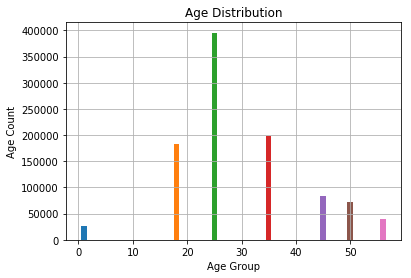

Age
25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
dtype: int64


In [4]:
#User_Age Distribution
Age = master_data.groupby("Age")
Age_Distribution=Age.size().sort_values(ascending=False)

#Histogram for age ditribution
Age["Age"].hist(bins=1)
plt.xlabel("Age Group")
plt.ylabel("Age Count")
plt.title("Age Distribution")
plt.show()

#No of users in the age group
print(Age_Distribution)

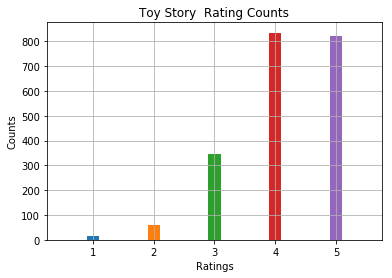

In [5]:
#User rating of the movie “Toy Story”
Toy_Story=master_data[master_data.Title=="Toy Story (1995)"]
Toy_Story = Toy_Story.groupby("Ratings")
Toy_Story["Ratings"].hist(bins=5)
plt.xlabel("Ratings")
plt.ylabel("Counts")
plt.title("Toy Story  Rating Counts")
plt.show()


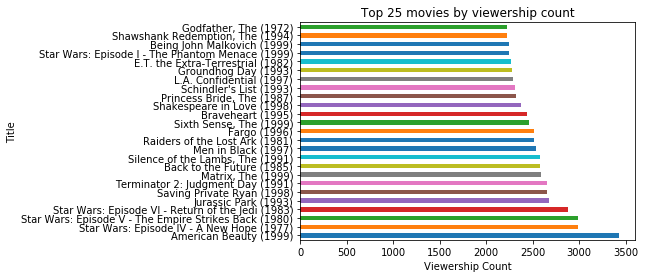

In [6]:
#Top 25 movies by viewership rating
viewership_rating = master_data.groupby("Title").size().sort_values(ascending=False)[:25]
plt.xlabel("Viewership Count")
plt.title("Top 25 movies by viewership count")
viewership_rating.plot(kind="barh")

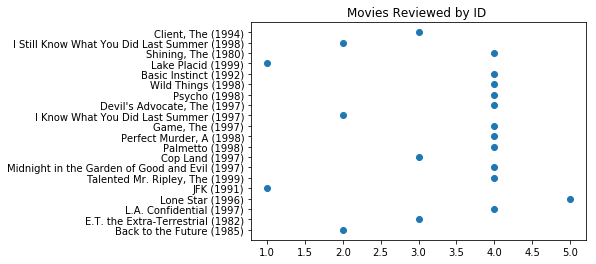

In [7]:
# Find the ratings for all the movies reviewed by for a particular user of user id = 2696
movies_reviewed_by_2696=master_data[master_data.UserId==2696]
plt.scatter(x=movies_reviewed_by_2696.Ratings, y=movies_reviewed_by_2696.Title)
plt.title("Movies Reviewed by ID ")
plt.show()

In [8]:
# Find the unique geners
result_array=[]
array=np.array(master_data['Geners'])
for element in array:
    if element.find('|')!= -1 :
        arr=element.split('|')
        for el in arr:
            result_array.append(el)
    else:
        result_array.append(element)
unique_geners=[]
for gen in result_array:
    if gen not in unique_geners:
        unique_geners.append(gen)
print(unique_geners)


['Drama', 'Animation', "Children's", 'Musical', 'Romance', 'Comedy', 'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'War', 'Thriller', 'Crime', 'Mystery', 'Western', 'Horror', 'Film-Noir', 'Documentary']


In [9]:
#Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre.
cols=['UserId', 'MovieId', 'Ratings', 'TimeStamp', 'Title','Gender', 'Age', 'Occupation', 'ZipCode']
cols.extend(unique_geners)
new_Data = pd.DataFrame(columns=cols)



In [11]:
#Merging the Data
res = master_data.merge(Movies, on = ['MovieId'], how="left")[["Geners_x","Ratings","Gender", "Age","UserId","MovieId","TimeStamp","Title_x","Occupation","ZipCode"]]



In [13]:
#Lable Encoder for first 2500 rows
#It takes some time for processing
for index, row in res.head(2500).iterrows():
    tmp = row["Geners_x"].split("|")
    for i in tmp:
       # print(i)
        new_Data.loc[index,"Gender"] = res.loc[index,"Gender"]
        new_Data.loc[index,"Age"] = res.loc[index,"Age"]
        new_Data.loc[index,"Ratings"] = res.loc[index,"Ratings"]
        new_Data.loc[index,"UserId"] = res.loc[index,"UserId"]
        new_Data.loc[index,"MovieId"] = res.loc[index,"MovieId"]
        new_Data.loc[index,"Occupation"]=res.loc[index,"Occupation"]
        new_Data.loc[index,"Title"]=res.loc[index,"Title_x"]
        new_Data.loc[index,"ZipCode"]=res.loc[index,"ZipCode"]
        new_Data.loc[index,"TimeStamp"]=res.loc[index,"TimeStamp"]
        new_Data.loc[index,i] = 1
    new_Data.loc[index,new_Data.columns[~new_Data.columns.isin(tmp+["Gender","Ratings","Age","UserId","MovieId","Occupation","Title","ZipCode","TimeStamp"])]] = 0

In [15]:
new_Data=pd.DataFrame(new_Data)

In [32]:
Dict_Type={'UserId':int,
          'MovieId':int,
          'Ratings':int,
          'TimeStamp':int,
          'Gender':int,
          'Occupation':int,
           'Age':int,
          'ZipCode':int,
          'Drama':int, 'Animation':int, "Children's":int, 'Musical':int, 
           'Romance':int, 'Comedy':int, 'Action':int, 'Adventure':int,
           'Fantasy':int, 'Sci-Fi':int, 'War':int, 'Thriller':int, 
           'Crime':int, 'Mystery':int, 'Western':int, 'Horror':int,
           'Film-Noir':int, 'Documentary':int}

In [23]:
def convert_gender(gen):
    if gen=="F":
        return 0
    else:
        return 1

new_Data["Gender"]=new_Data["Gender"].map(convert_gender)

In [33]:
new_Data=new_Data.astype(Dict_Type)

In [54]:
#Since Title is of object type and it connot be correlated so drop the column
new_Data=new_Data.drop(["Title"], axis=1)
new_Data.head()

,UserId,MovieId,Ratings,TimeStamp,Gender,Age,Occupation,ZipCode,Drama,Animation,...,Fantasy,Sci-Fi,War,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary
0,1,1193,5,2001,0,1,10,48067,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,661,3,2001,0,1,10,48067,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,914,3,2001,0,1,10,48067,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,3408,4,2001,0,1,10,48067,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2355,5,2001,0,1,10,48067,0,1,...,0,0,0,0,0,0,0,0,0,0


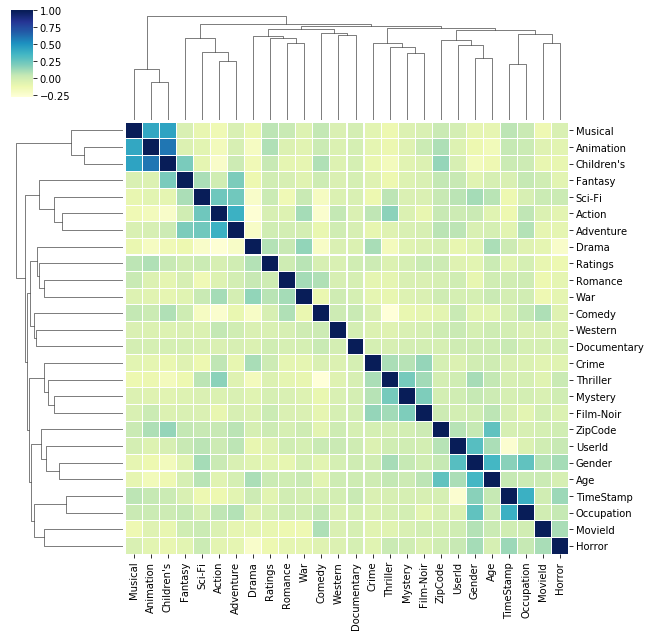

In [68]:
# Correlation Analysis to Determine the features affecting the ratings of any particular movie.

corrmat = new_Data.corr() 
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
  
cg

In [36]:
#Implementing Logistic Regression for prediction
X = new_Data[new_Data.columns[~new_Data.columns.isin(["Ratings"])]]
y = new_Data["Ratings"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 

In [37]:
lineReg=LogisticRegression()
lineReg.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
#Variance Score
print('Variance score: {}'.format(lineReg.score(X_test, y_test)))

Variance score: 0.3776


In [41]:
y_pred=lineReg.predict(X_test)
#Mean Square Error
print(np.mean(y_pred-y_test)**2)

0.173056


In [48]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='macro')



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.13829183998675523

In [49]:
f1_score(y_test, y_pred, average='weighted')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.23353947145133583

In [51]:
f1_score(y_test, y_pred, average=None)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([0.        , 0.        , 0.        , 0.54456654, 0.14689266])